### We are using *Covid-19 diagnose* dataset 

Importing Libraries

In [84]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

Image Preprocessing

In [51]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
training_data_generator = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [53]:
testing_data_generator = ImageDataGenerator(
    rescale=1.0/255
)

In [54]:
training_dataset = training_data_generator.flow_from_directory(
    'Covid-19/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.


In [55]:
testing_dataset = testing_data_generator.flow_from_directory(
    'Covid-19/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 66 images belonging to 3 classes.


Creating  model

In [56]:
classifier = Sequential()
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(16,(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units= 128, activation='relu'))
classifier.add(Dense(units= 3, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
classifier.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 3136)              0         
                                                                 
 dense_38 (Dense)            (None, 128)             

Training of our model

In [64]:
history = classifier.fit(
    training_dataset,
    steps_per_epoch=int(251/32),
    epochs=25,
    validation_data=testing_dataset,
    validation_steps= int(66/32)
)

Epoch 1/25
7/7 [==============================] - 5s 710ms/step - loss: 0.0566 - accuracy: 0.9772 - val_loss: 0.1611 - val_accuracy: 0.9531
Epoch 2/25
7/7 [==============================] - 6s 886ms/step - loss: 0.0386 - accuracy: 0.9863 - val_loss: 0.1632 - val_accuracy: 0.9688
Epoch 3/25
7/7 [==============================] - 9s 1s/step - loss: 0.0351 - accuracy: 0.9909 - val_loss: 0.1558 - val_accuracy: 0.9531
Epoch 4/25
7/7 [==============================] - 9s 1s/step - loss: 0.0378 - accuracy: 0.9911 - val_loss: 0.1012 - val_accuracy: 0.9844
Epoch 5/25
7/7 [==============================] - 9s 1s/step - loss: 0.0440 - accuracy: 0.9909 - val_loss: 0.1034 - val_accuracy: 0.9844
Epoch 6/25
7/7 [==============================] - 9s 1s/step - loss: 0.0681 - accuracy: 0.9726 - val_loss: 0.1069 - val_accuracy: 0.9531
Epoch 7/25
7/7 [==============================] - 6s 819ms/step - loss: 0.0798 - accuracy: 0.9680 - val_loss: 0.2082 - val_accuracy: 0.9375
Epoch 8/25
7/7 [================

In [70]:
import matplotlib.pyplot as plt

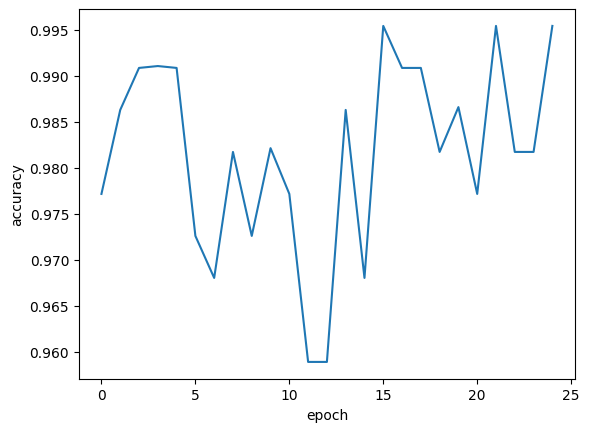

In [85]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

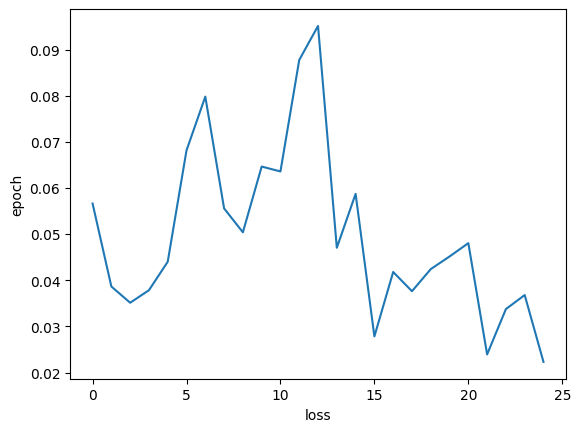

In [86]:
plt.plot(history.history['loss'])
plt.ylabel('epoch')
plt.xlabel('loss')
plt.show